#__Exploring the dataset__
We will now begin making use of the available datasets produced by the CMS collaboration. In this notebook, you will explore the contents of the available datasets and familiarize yourself with accessing the contents of the dataset and performing basic manipulation of the data. CMS data is organized as events where each event represents a particle collision. In a given event, one will have several variables representing physics objects that will be used in analysis.  


---


###__This notebook will be organized into two parts:__


1.   Loading and formating the dataset with `pandas`
2.   Plotting basic features of the dataset with `matplotlib`





In [36]:
#@markdown __Import some basic `python` libraries__
import os
import numpy as np
import ipywidgets as widgets

In [26]:
#@markdown __Setup the Colab environment__\ 
#@markdown When working in Google Colab, we need to mount our Drives to the 
#@markdown notebook so we can access files in our Drive.
from google.colab import drive
drive.mount( "/content/drive" )

%cd /content/drive/My\ Drive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive


##__Retrieve the Data__
The data we will work with is stoed as a `.csv` (comma-separated value) file. Make sure that you edit the variable `fPath` to match where you stored the notebook on your Google drive.   
We will load the data in three different ways. The first two ways we will use the `python` native method of `open()` and `readlines()` which will read out the row entries verbatim from the `.csv` file, and then we will store those contents in two different containers: `lists` and `dicts`.
The second method will be to use the library `pandas` to handle all the formatting for us directly from the `.csv` file.

In [27]:
#@markdown __Load the `.csv` file directly with `open()`__
data = []
fPath = "/cms-jupyter-materials-english-1.0-20220802T211257Z-001.zip (Unzipped Files)/cms-jupyter-materials-english-1.0/Data/Filtered Data"
fName = "Dimuon_DoubleMu.csv"
with open( os.path.join( os.getcwd() + fPath, fName ), "r" ) as f:
  for line in f.readlines():
    data.append( line )

In [28]:
#@markdown Print out the first 5 rows using `list` indexing and a `for` loop
for i in range( 5 ):
  print( data[i] )

Run,Event,type1,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M

165617,74601703,G,9.6987,-9.5104,0.3662,1.8633,9.5175,0.1945,3.1031,-1,G,9.7633,7.3277,-1.1524,6.3473,7.4178,0.7756,-0.1560,1,17.4922

165617,75100943,G,6.2039,-4.2666,0.4565,-4.4793,4.2910,-0.9121,3.0350,-1,G,9.6690,7.2740,-2.8211,-5.7104,7.8019,-0.6786,-0.3700,1,11.5534

165617,75587682,G,19.2892,-4.2121,-0.6516,18.8121,4.2622,2.1905,-2.9881,-1,G,9.8244,4.3439,-0.4735,8.7985,4.3697,1.4497,-0.1086,1,9.1636

165617,75660978,G,7.0427,-6.3268,-0.2685,3.0802,6.3325,0.4690,-3.0992,-1,G,5.5857,4.4748,0.8489,-3.2319,4.5546,-0.6605,0.1875,1,12.4774



In [29]:
import pandas

pandas.read_csv(os.path.join( os.getcwd() + fPath, fName ))

,Run,Event,type1,E1,px1,py1,pz1,pt1,eta1,phi1,...,type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,165617,74601703,G,9.6987,-9.5104,0.3662,1.8633,9.5175,0.1945,3.1031,...,G,9.7633,7.3277,-1.1524,6.3473,7.4178,0.7756,-0.1560,1,17.4922
1,165617,75100943,G,6.2039,-4.2666,0.4565,-4.4793,4.2910,-0.9121,3.0350,...,G,9.6690,7.2740,-2.8211,-5.7104,7.8019,-0.6786,-0.3700,1,11.5534
2,165617,75587682,G,19.2892,-4.2121,-0.6516,18.8121,4.2622,2.1905,-2.9881,...,G,9.8244,4.3439,-0.4735,8.7985,4.3697,1.4497,-0.1086,1,9.1636
3,165617,75660978,G,7.0427,-6.3268,-0.2685,3.0802,6.3325,0.4690,-3.0992,...,G,5.5857,4.4748,0.8489,-3.2319,4.5546,-0.6605,0.1875,1,12.4774
4,165617,75947690,G,7.2751,0.1030,-5.5331,-4.7212,5.5340,-0.7736,-1.5522,...,G,7.3181,-0.3988,6.9408,2.2825,6.9523,0.3227,1.6282,1,14.3159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,165548,604039696,G,15.5500,-0.6422,-14.3635,-5.9219,14.3779,-0.4010,-1.6155,...,T,3.5116,-1.0242,-0.7346,3.2759,1.2604,1.6834,-2.5194,-1,11.2077
99996,165548,604109784,G,29.0521,-2.5229,4.8188,-28.5381,5.4393,-2.3597,2.0531,...,G,9.8427,3.8924,-5.0569,-7.4929,6.3815,-0.9993,-0.9148,-1,14.5819
99997,165548,604123712,G,11.3198,-0.3840,8.7650,-7.1523,8.7734,-0.7445,1.6146,...,G,19.8499,-0.8391,-17.3203,9.6597,17.3406,0.5317,-1.6192,1,29.8425
99998,165548,604295320,G,8.7502,5.9613,1.0398,-6.3195,6.0513,-0.9124,0.1727,...,G,11.8601,-6.2436,0.4801,10.0717,6.2620,1.2534,3.0648,-1,20.2068


We can see the column names, which correspond to various physics objects and we can also see that the values are separated by commas, as expected, but there are also some strange characters at the ends of each row. What we want is ultimately a table of values where each entry can be defined by an `(x,y)` coordinate and read out with indexing. There are several ways we can think about this, and a few of those options will be demonstrated below.  
Some of the general tools we will use include:

*   `split()`: for systematically seperating a string by the defined character
*   `strip()`: for removing characters at the ends of strings



In [30]:
#@markdown __Option 1: Store as a `list` of `lists`__\
#@markdown In a list of lists, we will store each row as a list and each row will have
#@markdown entries corresponding to each column. In the case that we had multiple data
#@markdown types for the variables, we would instead use tuples.
data_1 = []
with open( os.path.join( os.getcwd() + fPath, fName ), "r" ) as f:
  for line in f.readlines():
    contents = line.strip( "\n" ).split( "," )
    data_1.append( contents )

In [31]:
#@markdown Print out the first 5 rows of our `list` of `lists`
for i in range(5):
  print( data_1[i] )

['Run', 'Event', 'type1', 'E1', 'px1', 'py1', 'pz1', 'pt1', 'eta1', 'phi1', 'Q1', 'type2', 'E2', 'px2', 'py2', 'pz2', 'pt2', 'eta2', 'phi2', 'Q2', 'M']
['165617', '74601703', 'G', '9.6987', '-9.5104', '0.3662', '1.8633', '9.5175', '0.1945', '3.1031', '-1', 'G', '9.7633', '7.3277', '-1.1524', '6.3473', '7.4178', '0.7756', '-0.1560', '1', '17.4922']
['165617', '75100943', 'G', '6.2039', '-4.2666', '0.4565', '-4.4793', '4.2910', '-0.9121', '3.0350', '-1', 'G', '9.6690', '7.2740', '-2.8211', '-5.7104', '7.8019', '-0.6786', '-0.3700', '1', '11.5534']
['165617', '75587682', 'G', '19.2892', '-4.2121', '-0.6516', '18.8121', '4.2622', '2.1905', '-2.9881', '-1', 'G', '9.8244', '4.3439', '-0.4735', '8.7985', '4.3697', '1.4497', '-0.1086', '1', '9.1636']
['165617', '75660978', 'G', '7.0427', '-6.3268', '-0.2685', '3.0802', '6.3325', '0.4690', '-3.0992', '-1', 'G', '5.5857', '4.4748', '0.8489', '-3.2319', '4.5546', '-0.6605', '0.1875', '1', '12.4774']


This method is a little better than what we had previously since we can at least see the entries separated as `list` elements, rather than all being stuck in one string.  We could even access the various entries using `(x,y)` indexing where `x` corresponds to the collision event number and `y` to the variable of interest. But, we can improve from here using dictionaries.

In [32]:
#@markdown __Option 2: Store as a `dict` grouped by variable__\
#@markdown Using the `dict` format, we can organize our data a little more intuitively
#@markdown where instead of defining an `(x,y)` coordinate to retrieve data and needing to
#@markdown remember what we associated `y` with.  We could instead call the entry with the
#@markdown variable name, and use the same definition for `x` being the collision number.\
#@markdown _Note: We will use the `enumerate()` method to handle the column headers._

data_2 = {}
with open( os.path.join( os.getcwd() + fPath, fName ), "r" ) as f:
  lines = f.readlines()
  for header in lines[0].strip( "\n" ).split( "," ): # create the dict keys from the first row
    data_2[ header ] = []
  for line in lines[1:]: # skip the header row
    contents = line.strip( "\n" ).split( "," )
    for i, header in enumerate( data_2.keys() ):
      data_2[ header ].append( contents[i] ) 

In [33]:
#@markdown Print out the first 5 entries of each `dict` key
for key in data_2.keys():
  print( "{}: {}".format( key, data_2[key][:5] ) )

Run: ['165617', '165617', '165617', '165617', '165617']
Event: ['74601703', '75100943', '75587682', '75660978', '75947690']
type1: ['G', 'G', 'G', 'G', 'G']
E1: ['9.6987', '6.2039', '19.2892', '7.0427', '7.2751']
px1: ['-9.5104', '-4.2666', '-4.2121', '-6.3268', '0.1030']
py1: ['0.3662', '0.4565', '-0.6516', '-0.2685', '-5.5331']
pz1: ['1.8633', '-4.4793', '18.8121', '3.0802', '-4.7212']
pt1: ['9.5175', '4.2910', '4.2622', '6.3325', '5.5340']
eta1: ['0.1945', '-0.9121', '2.1905', '0.4690', '-0.7736']
phi1: ['3.1031', '3.0350', '-2.9881', '-3.0992', '-1.5522']
Q1: ['-1', '-1', '-1', '-1', '-1']
type2: ['G', 'G', 'G', 'G', 'G']
E2: ['9.7633', '9.6690', '9.8244', '5.5857', '7.3181']
px2: ['7.3277', '7.2740', '4.3439', '4.4748', '-0.3988']
py2: ['-1.1524', '-2.8211', '-0.4735', '0.8489', '6.9408']
pz2: ['6.3473', '-5.7104', '8.7985', '-3.2319', '2.2825']
pt2: ['7.4178', '7.8019', '4.3697', '4.5546', '6.9523']
eta2: ['0.7756', '-0.6786', '1.4497', '-0.6605', '0.3227']
phi2: ['-0.1560', '-0.

The advantage with organizing the data by variable names is that it makes it much easier to plot. You will see later how we can directly take a group from the dictionary and plot it with `matplotlib` without having to further manipulate the data. It is also easier to get the statistics in this format using the library `numpy`.  


---


_Note: In some cases, one might want to work with the event-level organization of the data if one is calculating new variables using the existing one or if the event has a variable with more than one entry. In a particle collision, one could imagine that we generate several leptons, hadrons and photons that may each have a separate energy, mass and momentum. This is what we would call jagged array data because each event may not have the same number of leptons or hadrons. However, with our current data set, we are only considering summative variables that combine these numerous physics objects into single entities, like the total energy._

In [34]:
#@markdown __Option 3: Store as a `pandas.DataFrame()`__\
#@markdown One of the most frequently used libraries in `python` for data analysis
#@markdown is the `pandas` library because of its automatic structuring of common 
#@markdown data formats, such as `.csv`. We can simply use the `read_csv()` method to 
#@markdown read our file and `pandas` will do all the formatting work for us and print
#@markdown out an easy-to-read table in our notebook.

import pandas as pd

data_3 = pd.read_csv( os.path.join( os.getcwd() + fPath, fName ) )

In [35]:
#@markdown Print out the first five entries of our `dataframe`
data_3.head(5)

,Run,Event,type1,E1,px1,py1,pz1,pt1,eta1,phi1,...,type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,165617,74601703,G,9.6987,-9.5104,0.3662,1.8633,9.5175,0.1945,3.1031,...,G,9.7633,7.3277,-1.1524,6.3473,7.4178,0.7756,-0.1560,1,17.4922
1,165617,75100943,G,6.2039,-4.2666,0.4565,-4.4793,4.2910,-0.9121,3.0350,...,G,9.6690,7.2740,-2.8211,-5.7104,7.8019,-0.6786,-0.3700,1,11.5534
2,165617,75587682,G,19.2892,-4.2121,-0.6516,18.8121,4.2622,2.1905,-2.9881,...,G,9.8244,4.3439,-0.4735,8.7985,4.3697,1.4497,-0.1086,1,9.1636
3,165617,75660978,G,7.0427,-6.3268,-0.2685,3.0802,6.3325,0.4690,-3.0992,...,G,5.5857,4.4748,0.8489,-3.2319,4.5546,-0.6605,0.1875,1,12.4774
4,165617,75947690,G,7.2751,0.1030,-5.5331,-4.7212,5.5340,-0.7736,-1.5522,...,G,7.3181,-0.3988,6.9408,2.2825,6.9523,0.3227,1.6282,1,14.3159


One of the advantages of the `pandas.DataFrame()` is that it gives us the flexibility of treating the data both as a `list` of `lists` _and_ as a `dict` with column headers. There are many methods in `pandas` that will allow you to manipulate the data however you want, but it may require some getting used to and reading through the documentation to become familiar with. However, it's an investment that is well worth the time because data formatting and manipulation is one of the key tools of a particle physicist's toolkit.

#__Let's Get Analyzing!__
One of the most important aspects of data analysis is becoming intuitively familiar with your datasets. This includes understanding the scale of the variables you're working with, what the distribution looks like, and whether or not the variables are correlated with one another. You will embark on a few exercises to get a better sense of these features.

##__Simple Statistics__
Obtain the minimum, maximum, mean and standard deviation values for your dataset's $p_T$, $\eta$, $\phi$ and isolation variables.  
If you want to work with `dicts`, consider the `numpy` methods:

* `np.mean(dict["name"])`
* `np.std(dict["name"])`

If you want to work with `DataFrames`, consider the `pandas` methods:

* `df["name"].mean()`
* `df["name"].std()`

In [37]:
# write your code here
dicty = {}
variables = ["pt1", "eta1", "phi1", "pt2", "eta2", "phi2", 'M']
for i in variables:
    dicty.update({i + ' mean':data_3[i].mean()})
    dicty.update({i + ' std':data_3[i].std()})
print(dicty)


{'pt1 mean': 10.0716199, 'pt1 std': 9.97449521746801, 'eta1 mean': -0.09943802500000001, 'eta1 std': 1.3171704554447334, 'phi1 mean': -0.08988089599999999, 'phi1 std': 1.8220477396148245, 'pt2 mean': 10.007726252, 'pt2 std': 10.1311474234416, 'eta2 mean': 0.08368542799999999, 'eta2 std': 0.9747733123074107, 'phi2 mean': 0.102093534, 'phi2 std': 1.806128561594606, 'M mean': 17.691054685, 'M std': 20.95192650674552}


##__Defining New Variables__
One of the most basic features of a particle is its mass. More specifically, its rest mass--or invariant mass. We can calculate the invariant mass of a particle that decayed into two smaller particles following the formula:

$$M=\sqrt{2p_{T,1} p_{T,2}[\cosh(\eta_1-\eta_2)-\cos(\phi_1-\phi_2)]}$$

EIther using `dicts` or `pandas.DataFrames`, add a new column to your dataset for the invariant mass. 

* With `dicts`, you can simply define a new `key` and iterate through the total number of events, calling the respective entries for each of the inputs in the equation
* With `pandas.DataFrames`, you can perform columnar calculations and substitute for each variable the `DataFrames` column and then append the new `DataFrame` "M" the to existing one with `df.merge( M.to_frame("M"), left_index = True, right_index = True )`

In [38]:
import math

In [39]:
# write your code here
pt1s = data_3['pt1'].to_list()
pt2s = data_3['pt2'].to_list()
eta1s = data_3['eta1'].to_list()
eta2s = data_3['eta2'].to_list()
phi1s = data_3['phi1'].to_list()
phi2s = data_3['phi2'].to_list()
Mass  = []
for i in range(len(pt1s)):
    Mass.append(((2*(pt1s[i] * pt2s[i]))*(math.cosh(eta1s[i] - eta2s[i]) - math.cos(phi1s[i] - phi2s[i])))**0.5)
print(Mass[:5])




[17.49114122072158, 11.551450014623944, 9.160949499844548, 12.475562760417661, 14.314328132065143]


In [40]:
for i in data_3.columns:
    print(i)

Run
Event
type1
E1
px1
py1
pz1
pt1
eta1
phi1
Q1
type2
E2
px2
py2
pz2
pt2
eta2
phi2
Q2
M


##__Plotting Histograms__
Plot the invariant mass distribution for your dataset. Show the plot in both linear and logarithmic scales. Don't forget "good plotting" conventions, such as labels! It will be up to you to format your data such that it works with the plotting methods.

Consider using the following plotting methods from `matplotlib`:

* `plt.hist()`
* `plt.yscale()`
* `plt.title()`
* `plt.xlabel()`, `plt.ylabel()`
* `plt.legend()`

In [41]:
#@markdown First, import the `matplotlib` library
import matplotlib.pyplot as plt

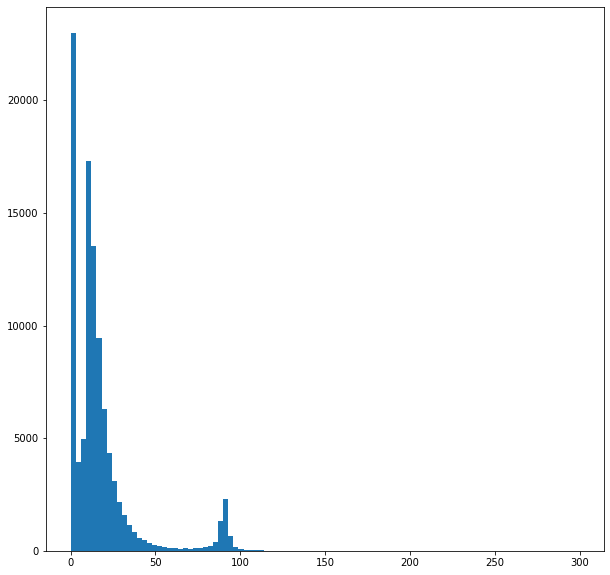

In [42]:
# your code here
plt.figure( figsize = (10,10) ) # define the dimensions of your plot

plt.hist(data_3['M'], bins = 100) # add your data into here

plt.show()
plt.close()

## __Fitting Data__
One of the main methods in which physicists will "measure" a particle's mass, or some other property, is by performing "fits" on the data. What we mean by a "fit" is we define an analytic function, i.e. $f(x)=y$, where $x$ might represent one of the parameters, such as the mass of the particle, and $f(x)$ represents the shape of the distribution. We then define a loss metric which is minimized the closer the fit is to the observed data. In a given fit, one might have several "free parameters" that can be adjusted to make the fit better.   

We will be using `curve_fit()` from scipy.optimize.  You can find documentation for usage [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html).

(array([2.63408681e+04, 5.25395726e+00, 1.28302426e+01]), array([[ 4.40393590e+05, -2.49590787e+02,  4.01635754e+01],
       [-2.49590787e+02,  1.21045306e+00, -8.23794510e-01],
       [ 4.01635754e+01, -8.23794510e-01,  7.35558891e-01]]))


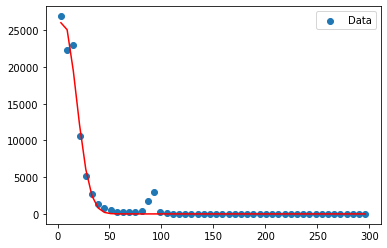

In [43]:
from scipy.optimize import curve_fit

def gaussian( x, c0, x0, s ):
  # x is the data
  # c0 is a scaling coefficient
  # x0 is the estimated mass
  # s is the standard deviation of the distribution
  return c0 * np.exp( - ( x - x0 )**2 / ( 2. * s**2 ) )

hist = np.histogram( data_3['M'], bins = 50 )
hist_bins = ( hist[1][:-1] + hist[1][1:] ) / 2

hist_fit = curve_fit( gaussian, hist_bins, hist[0] )

# add your plotting code here

print(hist_fit)
plt.scatter( hist_bins, hist[0], label = "Data" )
plt.plot( hist_bins, gaussian( hist_bins, hist_fit[0][0], hist_fit[0][1], hist_fit[0][2] ), c = 'r')
plt.legend()

##__Plotting the correlation between variables__
In particle collisions, there are many variables that can be defined to describe any given event. However, these variables are often times strongly related to each other, for example, the mass and energy. Try to identify from the set of variales available which pairs of variables have a strong correlation to one another, and which ones don't have a strong correlation. Use a scatter plot to demonstrate your results.

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [48]:
data_3.drop(columns = ['type1', 'type2'], inplace = True)

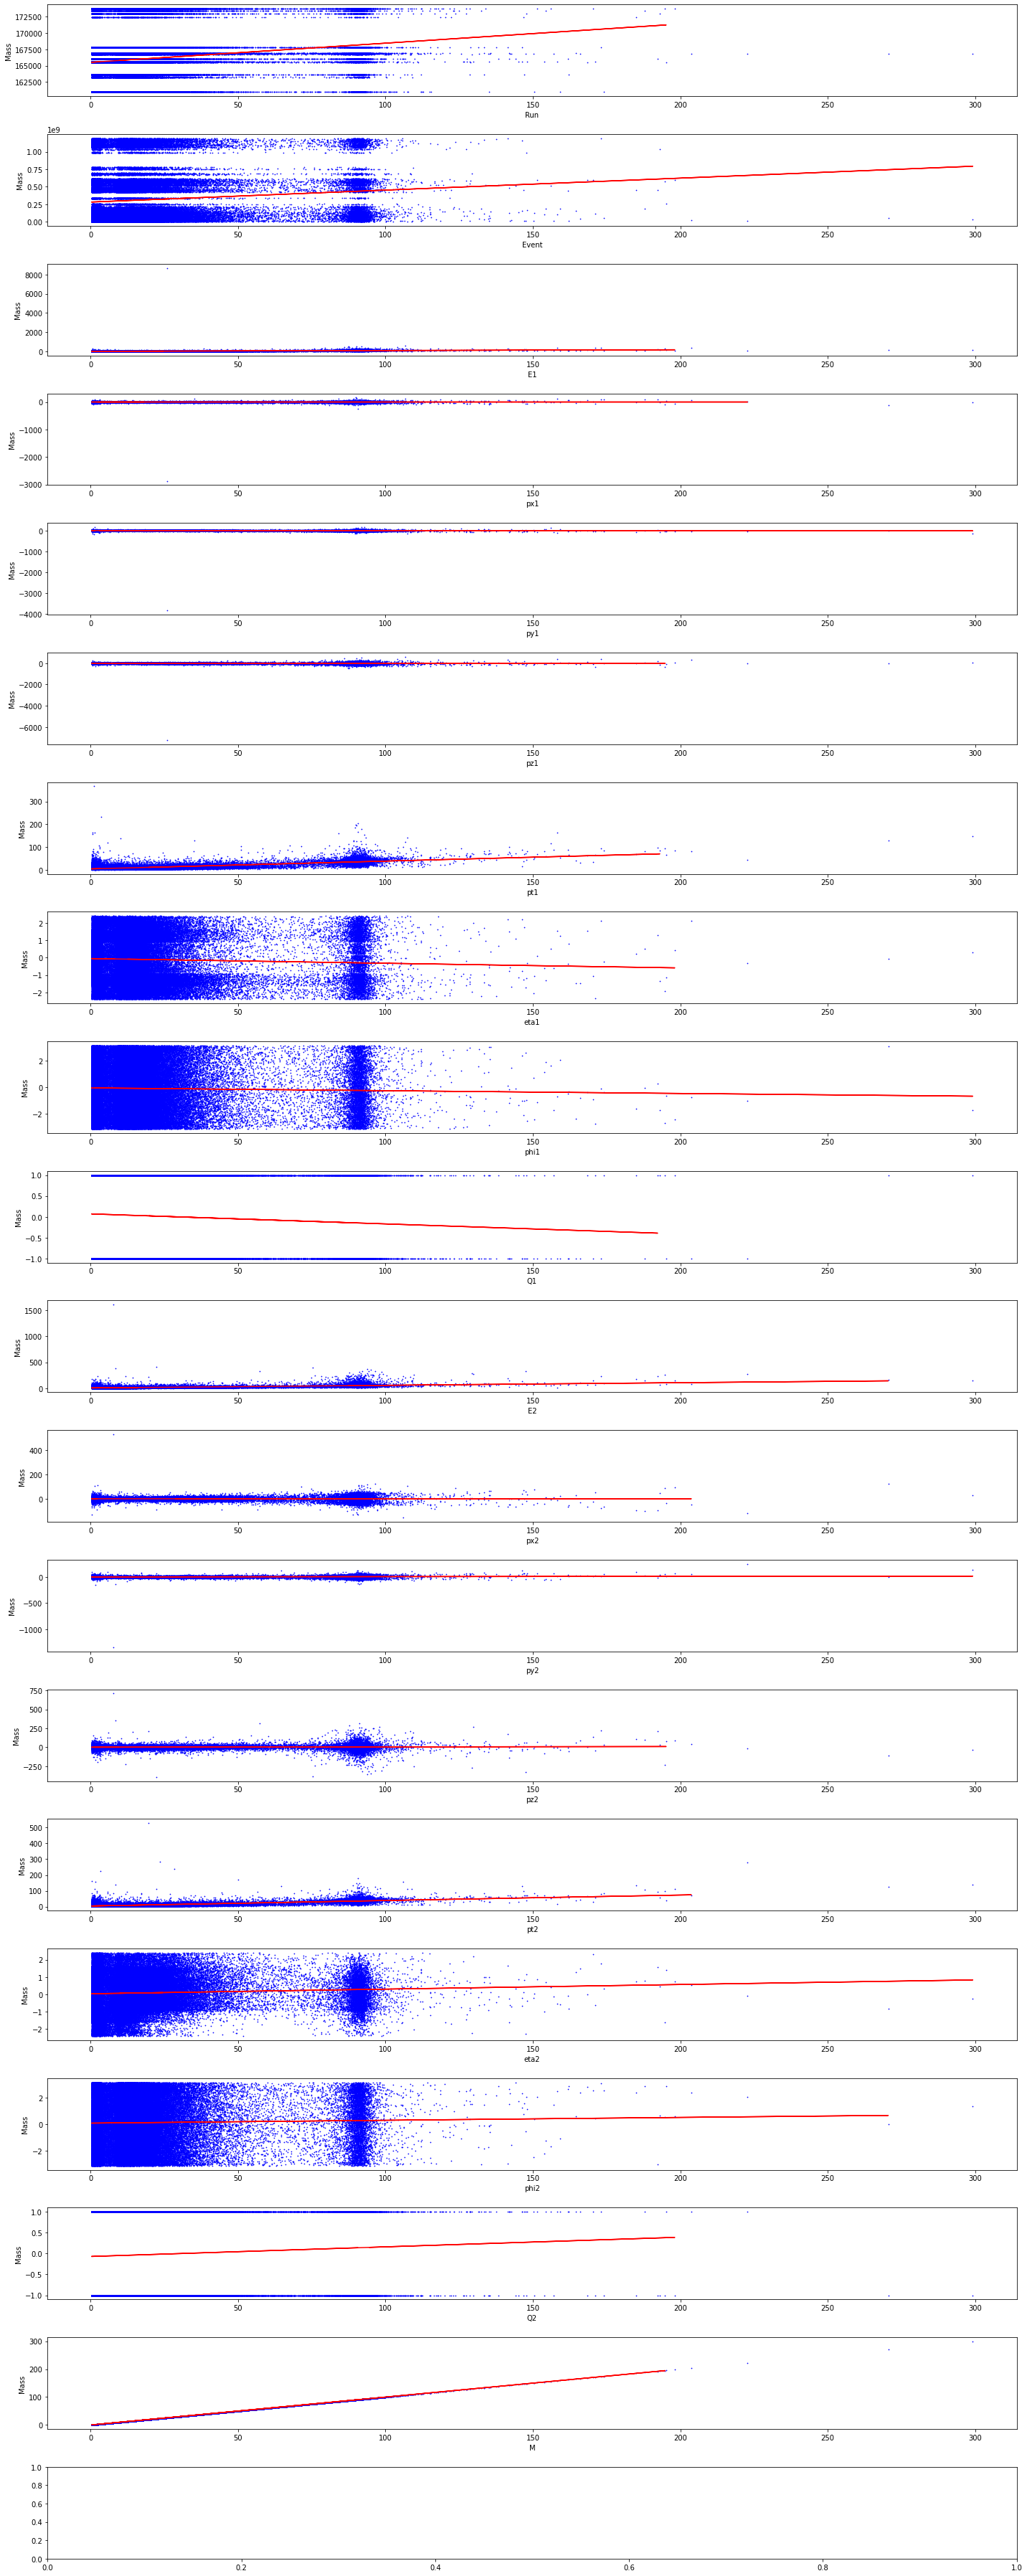

In [58]:
# your code here
linear_reg = LinearRegression()
coefs = []

fig, ax = plt.subplots(len(data_3.columns.to_list()) + 1, figsize = (20, 50))

for i in range(len(data_3.columns.to_list())):
    X = data_3['M']
    X2 = X.to_numpy().copy().reshape(-1,1)
    y = data_3[data_3.columns.to_list()[i]]
    y2 = y.to_numpy().copy().reshape(-1, 1)
    X_train, X_test, y_train, y_test = train_test_split(X2, y2)

    linear_reg.fit(X_train, y_train)
    y_pred = linear_reg.predict(X_test)
    #coefs.append(linear_reg.coef_)
    

    ax[i].plot(X_test, y_pred, c = 'r')
    ax[i].scatter(X, y, s = 0.5, c = 'b')
    ax[i].set_ylabel("Mass")
    ax[i].set_xlabel(data_3.columns.to_list()[i])

plt.tight_layout()

In [49]:
X = []

for idx in range(len(data_3['E1'].to_list())):
    newlist = []
    for columns in data_3.columns[2:18]:
        newlist.append(data_3[columns][idx])
    X.append(newlist)

print(X[:3])


[[9.6987, -9.5104, 0.3662, 1.8633, 9.5175, 0.1945, 3.1031, -1, 9.7633, 7.3277, -1.1524, 6.3473, 7.4178, 0.7756, -0.156, 1], [6.2039, -4.2666, 0.4565, -4.4793, 4.291, -0.9121, 3.035, -1, 9.669, 7.274, -2.8211, -5.7104, 7.8019, -0.6786, -0.37, 1], [19.2892, -4.2121, -0.6516, 18.8121, 4.2622, 2.1905, -2.9881, -1, 9.8244, 4.3439, -0.4735, 8.7985, 4.3697, 1.4497, -0.1086, 1]]


In [1]:
y = data_3['M'].to_list()
n_estimator = 100
#print(y)

NameError: name 'data_3' is not defined

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [60]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import ensemble
model = ensemble.GradientBoostingRegressor(n_estimators= n_estimator)

print(len(X), len(y))

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_staged = model.staged_predict(X_test)

100000 100000


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [61]:
import matplotlib.pyplot as plt

In [62]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred, multioutput='raw_values'))

0.023627198804820573
[0.0236272]


100


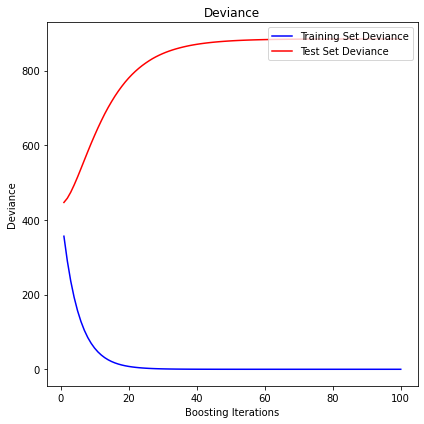

In [63]:
# I believe I got part of this from the internet not sure
# Method for graphing deviance over iteration for a staged predict model.
test_score = []
for i, y_pred in enumerate(model.staged_predict(X_test)):
    test_score.append(model.loss_(y_test, y_pred))
print(len(model.train_score_))
fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(np.arange(n_estimator) + 1, model.train_score_, "b-", label="Train Deviance")
plt.plot(np.arange(n_estimator) + 1, test_score, "r-", label="Test Deviance")
plt.legend(loc="upper right")
plt.xlabel("iterations")
plt.ylabel("deviance")
plt.show()
